In [6]:
import os
import pandas as pd
from glob import glob

In [10]:
this_dir = '../ori_writer/sales_data/new/'
xlsx_paths = glob(this_dir + '[!~$]*.xlsx')
xlsx_paths

['../ori_writer/sales_data/new\\April.xlsx',
 '../ori_writer/sales_data/new\\August.xlsx',
 '../ori_writer/sales_data/new\\December.xlsx',
 '../ori_writer/sales_data/new\\February.xlsx',
 '../ori_writer/sales_data/new\\January.xlsx',
 '../ori_writer/sales_data/new\\July.xlsx',
 '../ori_writer/sales_data/new\\June.xlsx',
 '../ori_writer/sales_data/new\\March.xlsx',
 '../ori_writer/sales_data/new\\May.xlsx',
 '../ori_writer/sales_data/new\\November.xlsx',
 '../ori_writer/sales_data/new\\October.xlsx',
 '../ori_writer/sales_data/new\\September.xlsx']

In [11]:
parts = []
for xlsx_path in xlsx_paths:
    print('Reading %s'%(xlsx_path))
    part = pd.read_excel(xlsx_path, index_col='transaction_id')
    parts.append(part)

Reading ../ori_writer/sales_data/new\April.xlsx
Reading ../ori_writer/sales_data/new\August.xlsx
Reading ../ori_writer/sales_data/new\December.xlsx
Reading ../ori_writer/sales_data/new\February.xlsx
Reading ../ori_writer/sales_data/new\January.xlsx
Reading ../ori_writer/sales_data/new\July.xlsx
Reading ../ori_writer/sales_data/new\June.xlsx
Reading ../ori_writer/sales_data/new\March.xlsx
Reading ../ori_writer/sales_data/new\May.xlsx
Reading ../ori_writer/sales_data/new\November.xlsx
Reading ../ori_writer/sales_data/new\October.xlsx
Reading ../ori_writer/sales_data/new\September.xlsx


In [12]:
df = pd.concat(parts)

In [17]:
pivot = pd.pivot_table(df, index = 'transaction_date', columns='store', values='amount', aggfunc='sum')
pivot

store,Boston,Chicago,Las Vegas,New York,San Francisco,Washington DC
transaction_date,,,,,,
2019-01-01,465.15,1277.25,269.70,1740.25,1739.20,355.15
2019-01-02,621.80,1177.50,369.45,1833.85,1861.45,326.70
2019-01-03,449.85,1204.95,302.25,1614.05,1736.20,286.95
2019-01-04,600.45,1165.25,340.95,1712.95,1763.75,204.55
2019-01-07,599.40,1197.80,395.90,1427.70,1967.20,265.65
...,...,...,...,...,...,...
2019-12-25,499.75,894.55,282.95,1480.95,1575.40,224.85
2019-12-26,382.65,971.85,298.25,1260.90,1427.75,193.35
2019-12-27,525.20,821.30,262.55,1429.75,1758.45,209.60


In [18]:
# 将一种时间序列重采样(resample)成另一个频率的数据
summary = pivot.resample('M').sum()
summary.index.name = 'Month'

summary

store,Boston,Chicago,Las Vegas,New York,San Francisco,Washington DC
Month,,,,,,
2019-01-31,13701.10,26272.65,7216.45,42128.25,42969.25,6515.40
2019-02-28,12243.85,24739.90,6192.60,37926.55,36469.35,6705.70
2019-03-31,11026.60,22131.00,5637.25,32805.60,33876.45,5173.80
2019-04-30,10344.80,21489.35,5540.40,32954.35,33265.00,5480.30
2019-05-31,10533.15,20606.55,5266.45,32348.55,31836.80,5293.95
2019-06-30,13317.90,24328.15,5713.55,38543.65,37787.30,5926.05
2019-07-31,10701.65,20877.90,5376.65,31547.60,31386.65,4982.55
2019-08-31,12239.70,24662.75,6335.05,36491.60,36895.10,6729.15
2019-09-30,10757.10,20964.35,5928.55,33226.20,31709.80,5544.45


## 2. 使用pandas读写Excel文件
### 2.1 read_excel函数和ExcelFile类
本节主要讲读取Excel工作簿中。

如下图， 数据从第一张工作表A1单元格开始的， 这确实很方便，但在实际场景中，你的Excel文件可能没有这么规整。 这时候， pandas提供了一些参数来优化读取过程。

In [1]:
from PIL import Image


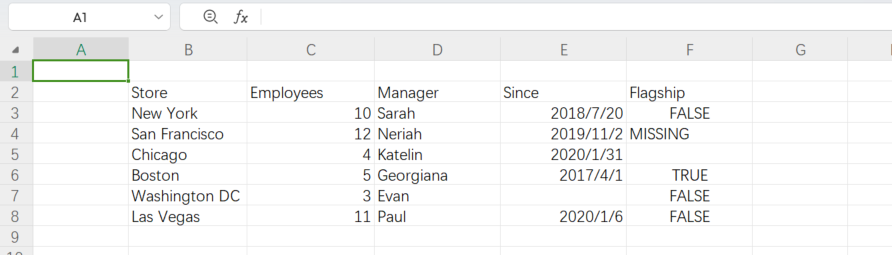

In [3]:
img = Image.open('../pic/pandas_read_excel.png')
img

通过sheet_name、skiprows和usecols这些参数，可以告诉pandas关于我们想要读取的列的详细信息。 一般来说， 可以通过之心info方法来了解生成的DataFrame的数据类型。

In [5]:
import pandas as pd

df = pd.read_excel('../ori_writer/xl/stores.xlsx', sheet_name='2019', skiprows=1, usecols='B:F')
df

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,MISSING
2,Chicago,4,Katelin,2020-01-31,NaN
3,Boston,5,Georgiana,2017-04-01,True
4,Washington DC,3,Evan,NaT,False
5,Las Vegas,11,Paul,2020-01-06,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Store      6 non-null      object        
 1   Employees  6 non-null      int64         
 2   Manager    6 non-null      object        
 3   Since      5 non-null      datetime64[ns]
 4   Flagship   5 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 368.0+ bytes


In [10]:
# flagship这一列看上去不对，应该是一个bool, 我们需要写一个转换函数

def fix_missing(x):
    return False if x in ["", "MISSING"] else x



In [11]:
df = pd.read_excel('../ori_writer/xl/stores.xls',  sheet_name='2019', skiprows=1, usecols='B:F', converters={'Flagship': fix_missing})
df

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,False
2,Chicago,4,Katelin,2020-01-31,False
3,Boston,5,Georgiana,2017-04-01,True
4,Washington DC,3,Evan,NaT,False
5,Las Vegas,11,Paul,2020-01-06,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Store      6 non-null      object        
 1   Employees  6 non-null      int64         
 2   Manager    6 non-null      object        
 3   Since      5 non-null      datetime64[ns]
 4   Flagship   6 non-null      bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(2)
memory usage: 326.0+ bytes


read_excel函数也可以接受一个工作名称列表， 这种情况下， 它返回的是以DataFrame为值、工作表名称为键的一个字典。要读入所有的工作表，你需要传递参数sheet_name=None,这边使用的usecols的一种变体， 传递了表的列名作为参数。

In [14]:
sheets = pd.read_excel('../ori_writer/xl/stores.xls', sheet_name=['2019','2020'], skiprows=1, usecols=['Store','Employees'])

sheets['2019'].head(2)

,Store,Employees
0,New York,10
1,San Francisco,12


如果源文件没有列标题，则设置参数header=None并通过names参数提供对应的列名， 注意sheet_name也接受工作表切片

In [21]:
# skipfooter 隐藏最后n行， skiprows 从第n行开始，
df = pd.read_excel('../ori_writer/xl/stores.xls', 
                   sheet_name=0, 
                   skiprows=2, 
                   skipfooter=2, 
                   usecols='B:C,F', 
                   header=None, 
                   names=['Branch','Employee_Count', 'Is_Flagship'],
                   na_values='MISSING', 
                   keep_default_na=False)
df

,Branch,Employee_Count,Is_Flagship
0,New York,10,False
1,San Francisco,12,NaN
2,Chicago,4,
3,Boston,5,True


pandas还提供了一种读取Excel文件的方法， 那就是使用ExcelFile类。如果你想从旧式的xls文件中读取多张工作表，ExcelFile就会发挥作用。在这种情况下，ExcelFile可以防止pandas多次读取整个文件。

In [22]:
with pd.ExcelFile('../ori_writer/xl/stores.xls') as f:
    df1 = pd.read_excel(f, '2019', skiprows=1, usecols='B:F', nrows=2)
    df2 = pd.read_excel(f, '2020', skiprows=1, usecols='B:F', nrows=2)
df1

,Store,Employees,Manager,Since,Flagship
0,New York,10,Sarah,2018-07-20,False
1,San Francisco,12,Neriah,2019-11-02,MISSING


In [24]:
df2

,Store,Employees,Manager,Since,Flagship
0,New York,11,Sarah,2018-07-20,False
1,San Francisco,10,Neriah,2019-11-02,True


也可以访问所有工作表的名称


In [25]:
stores = pd.ExcelFile('../ori_writer/xl/stores.xls')
stores.sheet_names

['2019', '2020', '2019-2020']

In [27]:
import numpy as np
import datetime as dt

data = [[dt.datetime(2020,1,1, 10, 13), 2.222, 1, True],
        [dt.datetime(2020,1,2), np.nan, 2, False],
        [dt.datetime(2020,1,2), np.inf, 3, True]]
df = pd.DataFrame(data=data,
                  columns=["Dates", "Floats", "Integers", "Booleans"])
df.index.name="index"
df

,Dates,Floats,Integers,Booleans
index,,,,
0,2020-01-01 10:13:00,2.222,1,True
1,2020-01-02 00:00:00,NaN,2,False
2,2020-01-02 00:00:00,inf,3,True


In [30]:
# 保存数据
df.to_excel('../save/written_with_pandas.xlsx', sheet_name='Output', startrow=1, startcol=1, index=True, header=True,
            na_rep="<NA>", inf_rep="<INF>")

In [31]:
df

,Dates,Floats,Integers,Booleans
index,,,,
0,2020-01-01 10:13:00,2.222,1,True
1,2020-01-02 00:00:00,NaN,2,False
2,2020-01-02 00:00:00,inf,3,True


In [33]:
# 要将多个DataFrame写入到同一个或多张表中，需使用ExcelClass类。
with pd.ExcelWriter('../save/written2_with_pandas.xlsx') as writer:
    df.to_excel(writer, sheet_name='sheet1', startrow=1, startcol=1)
    df.to_excel(writer, sheet_name='sheet1', startrow=10, startcol=1)
    df.to_excel(writer, sheet_name='sheet2')


## 使用pandas处理Excel文件的局限性
使用pandas接口读取简单的Excel文件非常好用，但是有一定的局限性


1. 将Datarame写入文件时， 无法将标题或图表写入文件
2. 无法修改Excel中标题和索引的默认格式
3. 在读取文件时， pandas会自动转换错误单元格(如 #REF!或#NUM!转换为NaN), 从而使你无法再工作表中查找特定的错误
4. 处理大型Excel文件时可能需要额外的设置